# IRIS FLOWER CLASSIFICATION

# IMPORTING THE  MODULES

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score,accuracy_score,classification_report
import warnings

# LOADING THE  DATASET

In [3]:
frame=pd.read_csv('Iris.csv')
frame.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### REMOVING THE UNWANTED COLUMN

In [4]:
#remove the id column
frame=frame.drop(columns=['Id'])
frame.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### DISPLAY THE DEATILS ABOUT DATASET

In [5]:
# for to display the statistics about data
frame.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# to display basic info about datatype
frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# to display number of samples on each class
frame['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# PREPROCESSING DATASET

In [8]:
#check for null values
frame.notnull().sum()

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [9]:
#scatterplot for each class
colors=["pink","yellow","green"]
Species=["Iris-setosa","Iris-versicolor","Iris-virginica"]

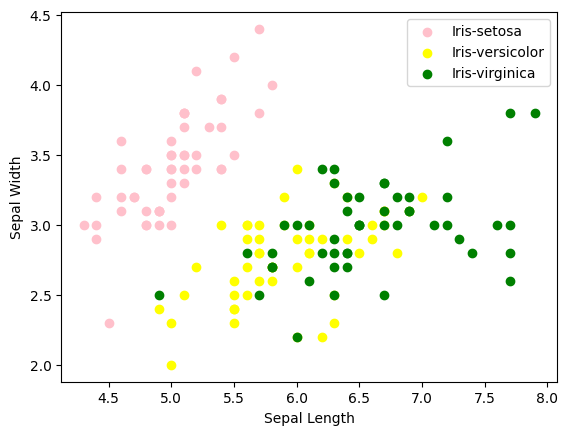

In [10]:
#for sepal length and width
for i in range(3):
    x=frame[frame["Species"] == Species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c=colors[i], label=Species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

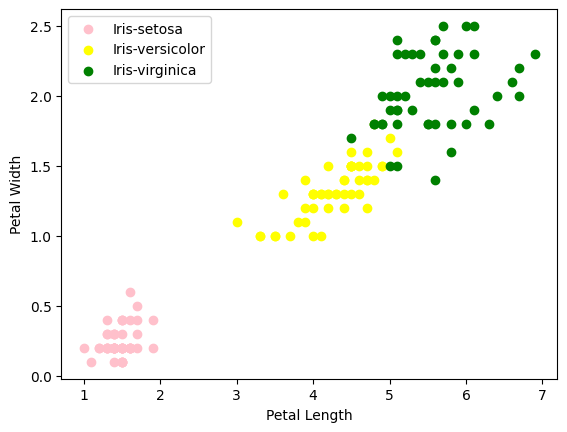

In [11]:
# petal length and width
for i in range(3):
    x=frame[frame["Species"] == Species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c=colors[i], label=Species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

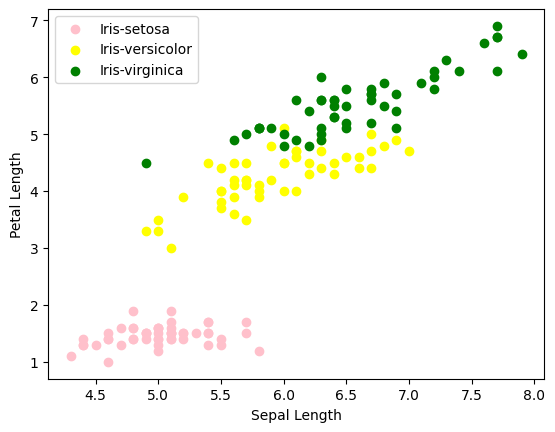

In [11]:
# for sepal lenth and  petal length
for i in range(3):
    x=frame[frame["Species"] == Species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c=colors[i], label=Species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

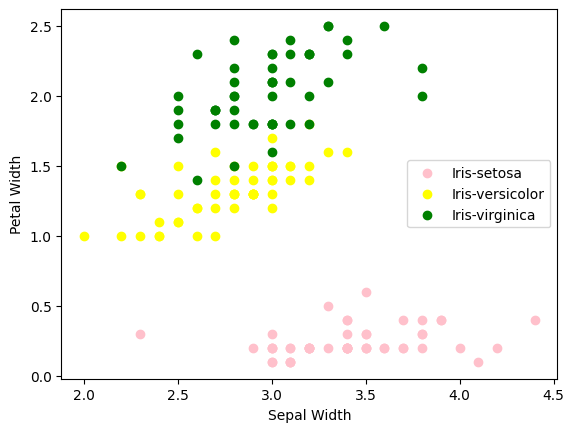

In [12]:
# for sepal and petal width
for i in range(3):
    x=frame[frame["Species"] == Species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c=colors[i], label=Species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [12]:
# correlation matix
frame.corr(numeric_only=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

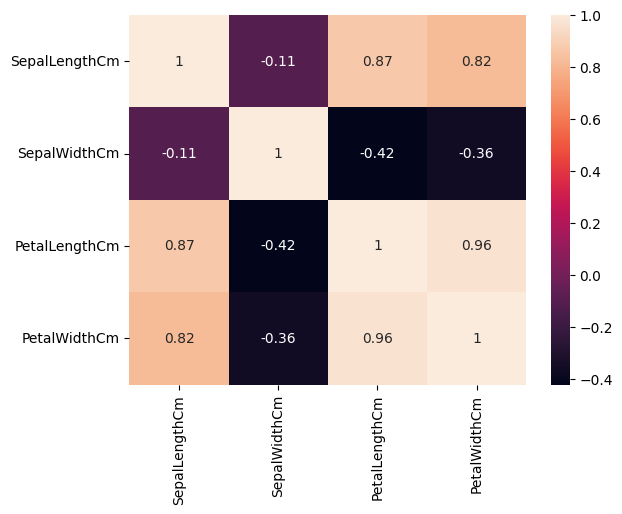

In [17]:
#representing correlation matrix in the form of heatmap graph
sns.heatmap(frame.corr(numeric_only=True),annot=True)

# ENCODING THE CATEGORICAL DATA

In [20]:
#used to change string into machine readble numbers
labele=LabelEncoder()
frame["Species"]=labele.fit_transform(frame["Species"])
frame.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### SPLITTING THE DATA INTO TRAIN AND TEST SETS

In [21]:
#split data for tarining -70%
#for test-30%
x=frame.drop(columns=["Species"])
y=frame["Species"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

# CALCULATING THE ACCURACY BASED ON DIFFERENT ALGORITHMS

In [22]:
#logistic regression
model=LogisticRegression()
model.fit(x_train,y_train)
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


In [26]:
#knn - k-nearest neighbours
model=KNeighborsClassifier()
model.fit(x_train,y_train)
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


In [24]:
#decision tree
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


# TRAIN THE MODEL

In [25]:
warnings.filterwarnings('ignore')
model = LogisticRegression()
#training the model
model=model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Accuracy Score: 95.55555555555556


# EVALUATING THE MODEL

In [19]:
#inputing the values of the iris species flower to identify the species of the iris flower
#0-iris-setosa
#1-iris-versicolor
#2-iris-verginica
y_pred=model.predict([[5.9,3.0,5.1,1.8]])
print(*y_pred)

2
